# Linear Support Vector Classifier

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [6]:
x = [1,5,1.5,8,1,9]
y= [2, 8, 1.8, 8, 0.6, 11]

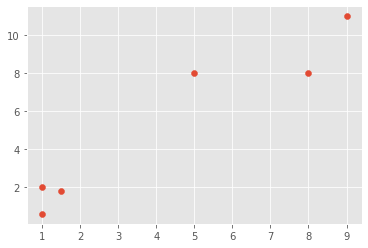

In [7]:
plt.scatter(x,y)
plt.show()

In [8]:
# array combinado
data = np.array(list(zip(x,y)))

In [9]:
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [10]:
target = [0,1,0,1,0,1]

In [11]:
classifier = svm.SVC(kernel="linear", C = 1.0)

classifier.fit(data,target)

SVC(kernel='linear')

In [12]:
p= np.array([12,12]).reshape(1,2)
print(p)
classifier.predict(p)


[[12 12]]


array([1])

In [13]:
classifier.coef_

array([[0.1380943 , 0.24462418]])

In [14]:
# es un array de array en este caso tiene 2 componentes
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [15]:
# pendiente de la recta 
a = -w[0]/w[1]

a


-0.5645161290322581

In [16]:
# ordenada en el origen 
b = -classifier.intercept_[0]/w[1]
b

6.734677437813051

* modelo : w0 * x + w1 * y + e = 0
*  ecuacion del hiperplano y = a * x + b, cuando es ndimencional a y x son vectores

In [17]:
xx = np.linspace(0, 10)
yy = a*xx + b

[]

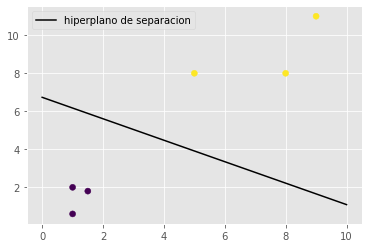

In [18]:
plt.plot(xx, yy, "k-", label = "hiperplano de separacion")
plt.scatter(x, y , c = target)
plt.legend()
plt.plot()


# Support Vector Machines

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [20]:
from sklearn.datasets.samples_generator import make_blobs

C:\Users\calanche\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
 # make_blobs= hacer burbujas , para hacer datasets dumies

x, y = make_blobs(n_samples = 50, centers= 2, random_state = 0, cluster_std= 0.6)
    

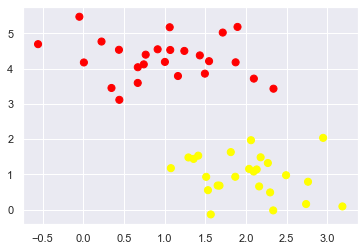

In [22]:
plt.scatter(x[:,0],x[:,1], c = y , s =50, cmap="autumn" )

(-1.0, 3.0)

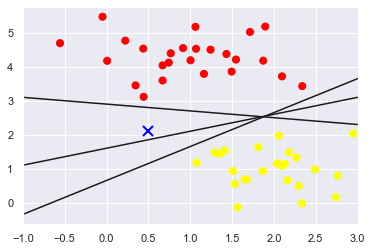

In [23]:
xx = np.linspace(-1, 3.5)
plt.scatter(x[:,0],x[:,1], c = y , s =50, cmap="autumn" )
plt.plot([0.5],[2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy,"-k" )
plt.xlim(-1,3,5)

## Maximizacion del margen

(-1.0, 3.0)

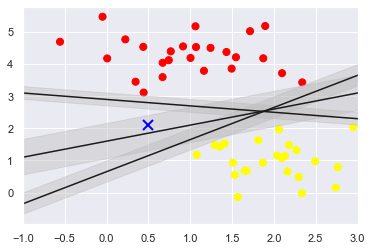

In [24]:
xx = np.linspace(-1, 3.5)
plt.scatter(x[:,0],x[:,1], c = y , s =50, cmap="autumn" )
plt.plot([0.5],[2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy,"-k" )
    plt.fill_between(xx, yy-d, yy+d, edgecolor = "none", color ="#BBBBBB", alpha = 0.4)
plt.xlim(-1,3,5)

#  nuestro objetivo es la maximizacion de los margenes

## Creacion del modelo SVM

In [25]:
from sklearn.svm import SVC


In [26]:
# hay mucho debate respecto al parametro c,
model = SVC(kernel="linear", C = 1E10)
model.fit(x,y)

SVC(C=10000000000.0, kernel='linear')

In [27]:
def plt_svc(model, ax=None, plot_support=True):
    """
    plot de la funcion de deicision para una clasificacion en 2d con SVC
  
  """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    
    yy = np.linspace(ylim[0], ylim[1], 30)
    y, x = np.meshgrid(yy, xx)
    
    xy = np.vstack([x.ravel(), y.ravel()]).T
    
    P = model.decision_function(xy).reshape(x.shape)
    
    # Represantamos las fronteras y los margenes del SVC
    ax.contour(x, y, P, colors = "k", levels = [-1,0,1], alpha = 0.5, linestyles = ["--","-","--"])
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth=1, facecolors = "black"
                  )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # la clave es encontrar los soportes o puntos que me den la maxima ampliacion del margen

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


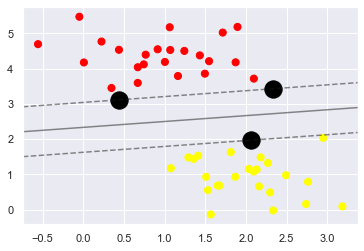

In [28]:
plt.scatter(x[:,0], x[:,1], c=y , s =50, cmap ="autumn")
plt_svc(model, plot_support =True)

In [29]:
def plot_svm (N = 10,  ax = None):
    x, y = make_blobs (n_samples=200, centers=2, random_state=0, cluster_std = 0.6)
    x = x[:N]
    y =y[:N]
    model = SVC(kernel ="linear", C=1E10)
    model.fit(x,y)
    # asignarse asi mimsma o crear
    ax = ax or plt.gca()
    ax.scatter(x[:,0],x[:,1], c=y, s =50, cmap="autumn")
    
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

    


[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


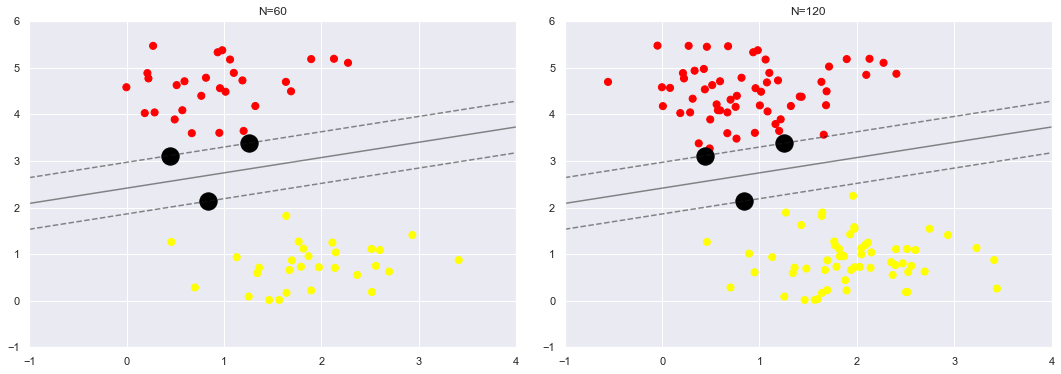

In [30]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
# ajuste margenes
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1 )
for ax_i, N, in zip(ax,[60,120]):
    plot_svm(N,ax_i)
    ax_i.set_title("N={0}".format(N))
    # podemos ver que no importa cuantos puntos tengamos, los soportes seguiran siendo los mismos, es insensible

In [31]:
from ipywidgets import interact, fixed

In [32]:
interact(plot_svm, N=[10, 200], ax= fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# Identificar fronteras no lineales

In [33]:
from sklearn.datasets.samples_generator import make_circles

In [34]:
x, y = make_circles (100, factor =.1 , noise = .1)

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def plt_svc(model, ax=None, plot_support=True):
    """
    plot de la funcion de deicision para una clasificacion en 2d con SVC
  
  """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    
    yy = np.linspace(ylim[0], ylim[1], 30)
    y, x = np.meshgrid(yy, xx)
    
    xy = np.vstack([x.ravel(), y.ravel()]).T
    
    P = model.decision_function(xy).reshape(x.shape)
    
    # Represantamos las fronteras y los margenes del SVC
    ax.contour(x, y, P, colors = "k", levels = [-1,0,1], alpha = 0.5, linestyles = ["--","-","--"])
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth=1, facecolors = "black"
                  )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # la clave es encontrar los soportes o puntos que me den la maxima ampliacion del margen

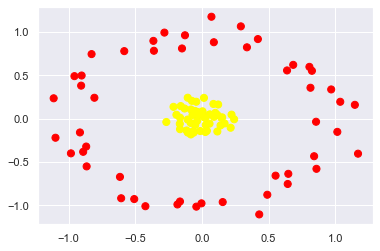

In [37]:
plt.scatter(x[:,0], x[:,1], c = y, s=50, cmap="autumn")

In [38]:
from sklearn.svm import SVC

[[ 1.17042213 -0.40343183]
 [-0.90296498  0.49785598]
 [ 0.82453389  0.55230756]
 [-0.60642092 -0.91734914]
 [ 0.64297992 -0.75272886]
 [-0.89143393 -0.38196145]
 [-0.12765108  0.961982  ]
 [-0.15006747  0.80985094]
 [ 0.85856401 -0.57801612]
 [-0.3645956   0.89731564]
 [-0.04240705 -1.01412197]
 [-0.90661088  0.38114811]
 [-0.58312704  0.77921045]
 [-0.8071923   0.24138342]
 [-0.16519777 -0.95462851]
 [ 0.81368845  0.35673252]
 [-0.9567971   0.49068495]
 [-0.91547817 -0.15864068]
 [-1.09902719 -0.21958029]
 [ 0.48987047 -0.8770125 ]
 [-0.00386437 -0.97609449]
 [-1.11269347  0.23531577]
 [ 0.80578091  0.59775554]
 [-0.86869338 -0.32116216]
 [ 0.55182587 -0.65683681]
 [-0.82836269  0.74488142]
 [-0.18427253 -0.9890214 ]
 [-0.61535101 -0.67103825]
 [ 0.85558081 -0.03528792]
 [-0.42458214 -1.0090788 ]
 [ 1.01508674 -0.15196241]
 [ 0.08887896  0.88172688]
 [ 1.14660881  0.15973218]
 [ 0.96908542  0.33731578]
 [-0.86540287 -0.549999  ]
 [ 0.33707509  0.82308037]
 [-0.28202545  0.99269354]
 

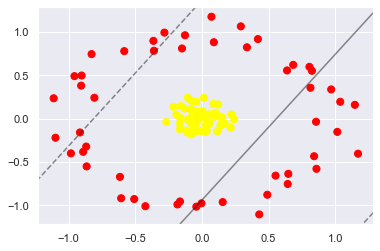

In [39]:
plt.scatter(x[:,0], x[:,1], c = y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(x,y), plot_support = False)

In [40]:
r = np.exp(-(x**2).sum(1))

In [41]:
r

array([0.97525046, 0.21596365, 0.97611246, 0.34534674, 0.37347665,
       0.29841332, 0.97719457, 0.37530212, 0.39041344, 0.38996271,
       0.50743899, 0.96187173, 0.95895448, 0.96884468, 0.34258523,
       0.39136866, 0.96381644, 0.93765755, 0.35692067, 0.38013943,
       0.38782306, 0.49173007, 0.39117279, 0.95440075, 0.45414126,
       0.99328494, 0.96562521, 0.3146695 , 0.99226458, 0.99648226,
       0.42178181, 0.99414344, 0.96879794, 0.2847692 , 0.36453817,
       0.99305038, 0.99948037, 0.38566915, 0.27431992, 0.96441583,
       0.97312482, 0.97090289, 0.99399863, 0.36546142, 0.98949074,
       0.42410538, 0.99917967, 0.99355159, 0.47905188, 0.28908542,
       0.9530277 , 0.97497938, 0.94346417, 0.96926048, 0.36344776,
       0.43650773, 0.48033871, 0.30164332, 0.34871732, 0.45596384,
       0.98840862, 0.96080535, 0.26178646, 0.98563241, 0.95939313,
       0.34892144, 0.9980461 , 0.34944083, 0.4533545 , 0.96969388,
       0.34473516, 0.24595922, 0.99783218, 0.9295676 , 0.32724

In [42]:
from mpl_toolkits  import mplot3d

In [43]:
def plot_3D(elev=30, azim=30, x=x, y=y, r=r):
    ax= plt.subplot(projection="3d")
    ax.scatter3D(x[:,0],x[:,1], r, c =y, s=50, cmap = "autumn")
    ax.view_init(elev= elev, azim = azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [44]:
from ipywidgets import interact, fixed

In [45]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim =[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], x=fixed(x), y = fixed(y), r= fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, x=array([[-0.06615892, -0.14381919],
       [ 1.17042213, -0.40343183],
       [ 0.02537521, -0.15340656],
       [-0.90296498,  0.49785598],
       [ 0.82453389,  0.55230756],
       [-0.60642092, -0.91734914],
       [ 0.15107589,  0.01567072],
       [ 0.64297992, -0.75272886],
       [-0.89143393, -0.38196145],
       [-0.12765108,  0.961982  ],
       [-0.15006747,  0.80985094],
       [-0.19190226,  0.04525149],
       [-0.16496244, -0.12123972],
       [ 0.16927776, -0.05473584],
       [ 0.85856401, -0.57801612],
       [-0.3645956 ,  0.89731564],
       [-0.10700278, -0.15938889],
       [-0.21370924,  0.13674369],
       [-0.04240705, -1.01412197],
       [-0.90661088,  0.38114811],
       [-0.58312704,  0.77921045],
       [-0.8071923 ,  0.24138342],
       [-0.16519777, -0.95462851],
       [-0.15977329,  0.14541019],
       [ 0.81368845,  0.35673252],
       [-0.03127833,  0.07589055],
       [ 0.1151332 , -0.14739011],
       [

In [46]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(x,y)

SVC(C=1000000.0)

[[-0.84279247  0.29045404]
 [-0.93647452 -0.30273006]
 [ 0.48778472 -0.75921704]
 [-0.34221336 -0.752768  ]
 [-0.22178583  0.88203993]
 [ 0.83785476  0.37814114]
 [ 0.68050073 -0.59446759]
 [ 0.88440037 -0.10632554]
 [ 0.29207202  0.90189237]
 [-0.25749011  0.08324419]
 [ 0.32794875  0.09418191]
 [-0.17449025 -0.22472255]]


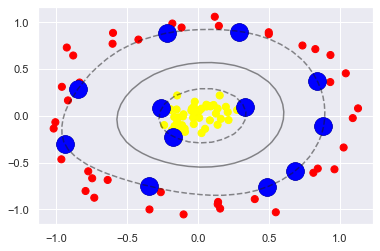

In [97]:
plt.scatter(x[:,0],x[:,1], c=y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

## Ajustar los parametros de SVM

In [47]:
x, y = make_blobs(n_samples=100, centers = 2, random_state =0, cluster_std=1.2)

[[-8.90728186e-02  1.92683157e+00]
 [ 1.53506501e+00  2.46029490e+00]
 [ 2.39080556e+00  4.08787752e+00]
 [ 2.34355090e+00  2.82199634e+00]
 [-2.81993480e-01  2.59976580e+00]
 [ 1.45908005e+00  3.48201522e+00]
 [ 3.69997563e+00  2.55854852e+00]
 [ 3.23605092e+00  2.68647645e+00]
 [-6.86865005e-02  3.60916773e+00]
 [ 3.21733967e+00  3.13105387e+00]
 [ 2.01359352e+00  3.41318930e+00]
 [ 1.35195132e+00  3.27887244e+00]
 [ 4.94540093e-04  2.23224820e+00]
 [ 1.18918145e+00  3.82165020e+00]
 [ 3.63303913e-01  2.88702871e+00]
 [ 2.76916497e+00  4.05759741e+00]
 [ 4.65115066e+00  2.50149720e+00]
 [ 4.36279795e+00  2.67428141e+00]
 [ 1.73366348e+00  1.86061133e+00]
 [ 1.16779193e+00  2.74928117e+00]
 [ 2.41315333e+00  2.48932674e+00]
 [ 1.53308326e+00  3.11678013e+00]
 [ 1.97337760e+00  2.95367493e+00]
 [ 2.65758410e-01  1.42493370e+00]
 [ 6.47519435e-01  3.23000908e+00]
 [ 1.29225223e+00  1.70938361e+00]
 [ 1.45762858e+00  3.21310212e+00]
 [ 8.14176111e-01  1.71557708e+00]
 [ 2.79216277e+00  2

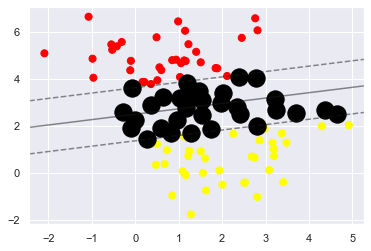

In [48]:
plt.scatter(x[:,0],x[:,1], c = y, s=50, cmap="autumn")
model = SVC(kernel="linear",C=00.1)
model.fit(x,y)
plt_svc(model)

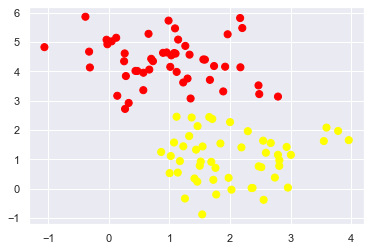

In [49]:
# para valores altos de c, el margen es mas duro
x, y = make_blobs(n_samples=100, centers = 2, random_state =0, cluster_std=0.8)
plt.scatter(x[:,0],x[:,1], c = y, s=50, cmap="autumn")


[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]
 [1.36628697 2.42571562]]
[[0.26604148 2.71915015]
 [1.34880003 3.07479238]
 [1.88779063 3.31592667]
 [0.13742771 3.16777298]
 [2.79207378 3.14029479]
 [2.48279064 3.22558008]
 [2.47031647 3.52196502]
 [1.66781904 3.71005531]
 [0.32575305 2.92276125]
 [0.56762597 3.35928158]
 [3.59362114 2.08207549]
 [1.46361712 2.13207534]
 [2.29385806 1.95877238]
 [1.70714468 2.37707464]
 [2.00067424 2.26833784]
 [1.1167688  2.45256061]
 [1.65684156 2.4412893 ]
 [1.36628697 2.42571562]
 [1.32500974 1.79127669]
 [1.07491911 1.57315404]]


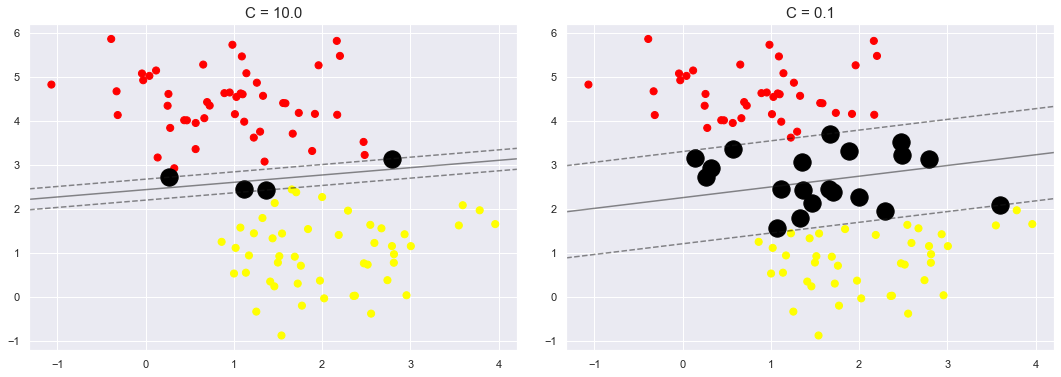

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.06, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax,[10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(x,y)
    ax_i.scatter(x[:,0], x[:,1], c = y, s= 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size=15)

# Reconocimiento Facial

In [113]:
from sklearn.datasets import fetch_lfw_people


In [114]:
faces  = fetch_lfw_people(min_faces_per_person=60)

KeyboardInterrupt: 

In [ ]:
print(faces.target_names)